In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

In [4]:
train = pd.read_csv(r"C:\Users\Ayush Ahlawat\OneDrive\Documents\Understanding ML\First Model\DatasetFor0-9\Dataset\mnist_train.csv")

In [5]:
data = train.iloc[:,1:].to_numpy()
label = train.iloc[:,0].to_numpy()

In [6]:
data = data.reshape(-1,28,28,1)  

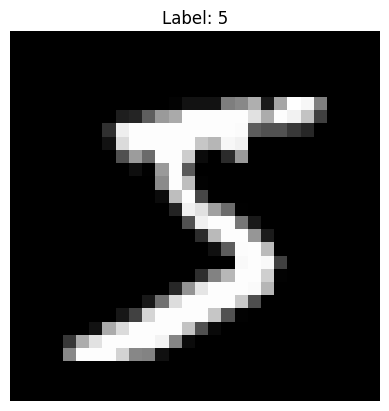

In [7]:
plt.imshow(data[0], cmap = 'gray')
plt.title(f"Label: {label[0]}")
plt.axis("off")
plt.show()

In [8]:
data = data/255.

In [9]:
label_encoded = to_categorical(label, num_classes = 10)
print("Before Label: ", label[0])
print("After Label: ", label_encoded[0])

Before Label:  5
After Label:  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [10]:
X_train, X_test, y_train, y_test = train_test_split(data, label_encoded, test_size = 0.2, random_state = 42)

In [13]:
model = Sequential([
    Conv2D(filters = 32, input_shape = (28,28,1), activation = 'relu', kernel_size = (3,3), padding = 'same'),
    Conv2D(filters = 64, input_shape = (28,28,1), activation = 'relu', kernel_size = (3,3), padding = 'same'),
    MaxPooling2D(pool_size = (2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,625,866 (6.20 MB)

 Trainable params: 1,625,866 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [17]:
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

In [22]:
history = model.fit(X_train, y_train, epochs = 20, validation_split = 0.1, batch_size = 64, verbose = 1, callbacks = [early_stop])

Epoch 1/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 63s 93ms/step - accuracy: 0.9871 - loss: 0.0394 - val_accuracy: 0.9900 - val_loss: 0.0344
Epoch 2/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 68s 100ms/step - accuracy: 0.9892 - loss: 0.0328 - val_accuracy: 0.9906 - val_loss: 0.0352
Epoch 3/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 70s 104ms/step - accuracy: 0.9891 - loss: 0.0302 - val_accuracy: 0.9915 - val_loss: 0.0395
Epoch 4/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 66s 98ms/step - accuracy: 0.9917 - loss: 0.0256 - val_accuracy: 0.9910 - val_loss: 0.0337
Epoch 5/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 76s 113ms/step - accuracy: 0.9917 - loss: 0.0263 - val_accuracy: 0.9919 - val_loss: 0.0294
Epoch 6/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 72s 107ms/step - accuracy: 0.9927 - loss: 0.0225 - val_accuracy: 0.9912 - val_loss: 0.0319
Epoch 7/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 80s 103ms/step - accuracy: 0.9933 - loss: 0.0196 - val_accuracy: 0.9894 - val_loss: 0.0394
Epoch 8/20
675/675 ━━━━━━━━━━━━━━━━━━━━ 74s 110ms/step - accuracy: 0.9942 - loss: 0.0

In [23]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9908 - loss: 0.0366


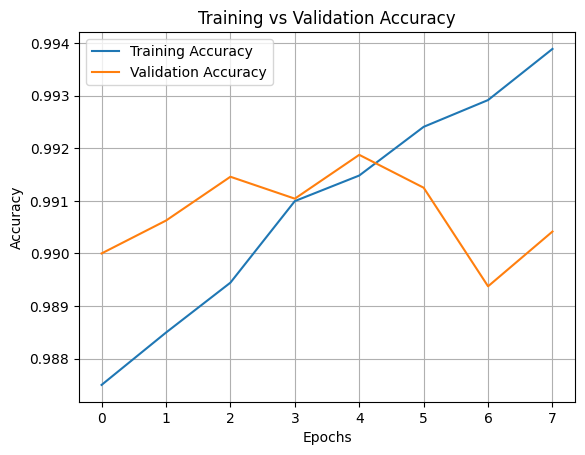

In [24]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

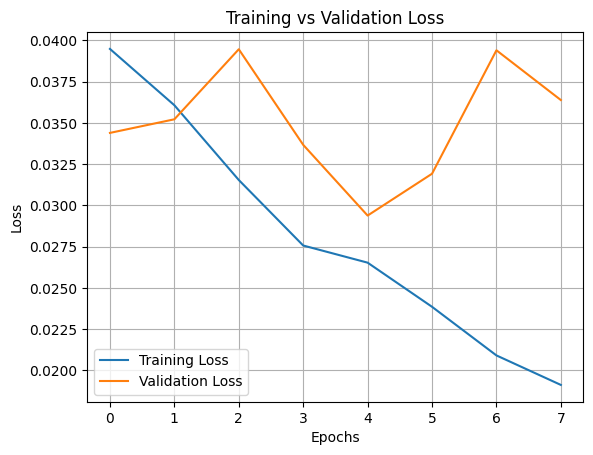

In [25]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

In [26]:
predictions = model.predict(X_test)
predicted = np.argmax(predictions, axis = 1)
truel = np.argmax(y_test, axis = 1)
print("Predicted: ", predicted[:10])
print("True: ", truel[:10])

375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step 
Predicted:  [7 3 8 9 3 9 7 7 5 4]
True:  [7 3 8 9 3 9 7 7 5 4]


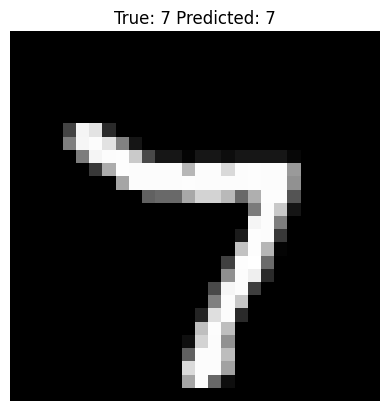

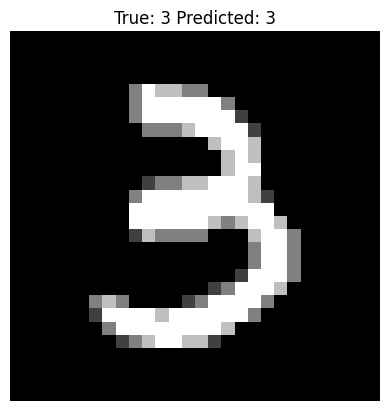

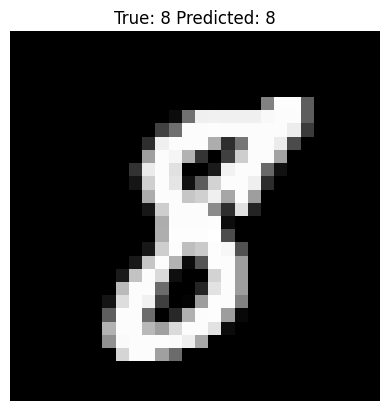

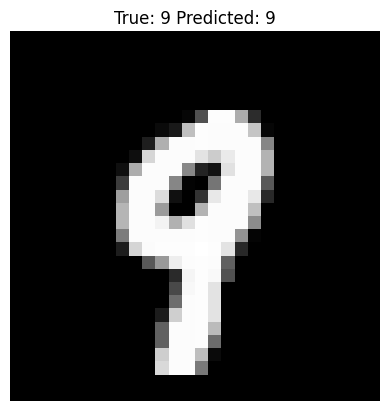

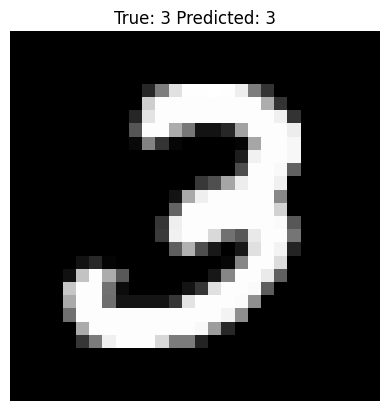

In [27]:
for i in range(5):
    plt.imshow(X_test[i], cmap = 'gray')
    plt.title(f"True: {truel[i]} Predicted: {predicted[i]}")
    plt.axis('off')
    plt.show()

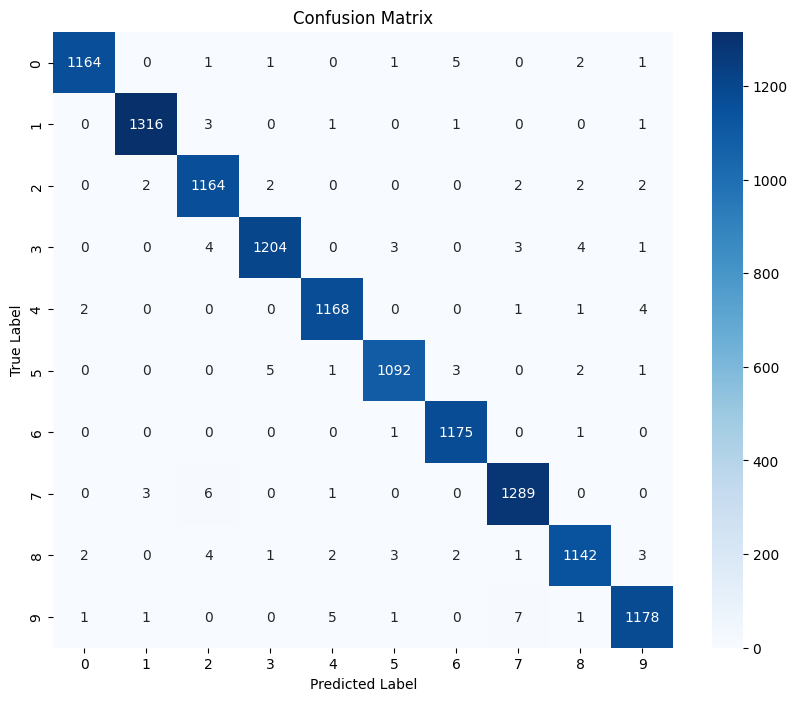

In [30]:
cm = confusion_matrix(truel, predicted)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()